In [19]:
import joblib

metrics_results = joblib.load('data/test.pkl')

incrx_results = metrics_results['Incx']
d_rise_results = metrics_results['D-RISE']

In [20]:
metrics = list(metrics_results['Incx']['RT_DETR'].keys())
metrics

['Insertion', 'Deletion', 'EPG', 'Explanation Proportion', 'Time']

In [21]:
models = list(metrics_results['Incx'].keys())
models

['YOLO', 'RT_DETR', 'FASTER_RCNN']

In [22]:
def filter_array(array):
    """Filters out zero and NaN values from the array."""
    return array[(array != 0) & ~np.isnan(array)]

In [23]:
import pandas as pd
import numpy as np
from incx.models.model_enum import ModelEnum



results = []

for model in ModelEnum:
    for metric in metrics:
        filtered_values_incrx = filter_array(np.array(incrx_results[model.name][metric]).flatten())
        average_value_incrx = np.mean(filtered_values_incrx)
        std_incrx = np.std(filtered_values_incrx)
        results.append({
            'Source': 'incrx_results',
            'Model': model.name + ' incrx',
            'Metric': metric,
            'Average': average_value_incrx,
            'STD': std_incrx
        })
        
        filtered_values_d_rise = filter_array(np.array(d_rise_results[model.name][metric]).flatten())
        average_value_d_rise = np.mean(filtered_values_d_rise)
        std_d_rise = np.std(filtered_values_d_rise)
        results.append({
            'Source': 'd_rise_results',
            'Model': model.name + ' d_rise',
            'Metric': metric,
            'Average': average_value_d_rise,
            'STD': std_d_rise
        })

df = pd.DataFrame(results)

pivot_df_avg = df.pivot_table(index='Model', columns=['Metric'], values='Average')[["Insertion", "Deletion", "EPG", "Explanation Proportion", "Time"]]
pivot_df_std = df.pivot_table(index='Model', columns=['Metric'], values='STD')[["Insertion", "Deletion", "EPG", "Explanation Proportion", "Time"]]


In [24]:
print("Pivot Table of Averages:")
pivot_df_avg

Pivot Table of Averages:


Metric,Insertion,Deletion,EPG,Explanation Proportion,Time
Model,,,,,
FASTER_RCNN d_rise,0.897523,0.016449,0.244864,0.046530,40.285157
FASTER_RCNN incrx,0.889054,0.021111,0.269257,0.056775,0.364525
RT_DETR d_rise,0.899341,0.032667,0.244811,0.054689,57.737714
RT_DETR incrx,0.885379,0.037445,0.250149,0.051366,0.666790
YOLO d_rise,0.674820,0.022570,0.274392,0.286810,30.045823
YOLO incrx,0.723056,0.021127,0.256537,0.262741,0.769178


In [25]:
print("Pivot Table of Standard deviations:")
pivot_df_std

Pivot Table of Standard deviations:


Metric,Insertion,Deletion,EPG,Explanation Proportion,Time
Model,,,,,
FASTER_RCNN d_rise,0.100035,0.031525,0.149741,0.073922,27.311269
FASTER_RCNN incrx,0.114807,0.033484,0.173283,0.078957,4.305939
RT_DETR d_rise,0.128137,0.034644,0.106772,0.113878,50.528367
RT_DETR incrx,0.125838,0.041958,0.106519,0.092702,10.106779
YOLO d_rise,0.403056,0.151142,0.165424,0.334309,30.189933
YOLO incrx,0.471668,0.054521,0.155995,0.284691,10.305499


C:\Users\santiago.calderon\AppData\Local\Temp\ipykernel_33056\413035253.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='category', y='value', ax=ax, palette={'YOLOv10': '#7F9AC1', 'RT-DETR': '#F4A261', 'Faster R-CNN': '#A3BFA8'}, linewidth=2,showfliers=False)


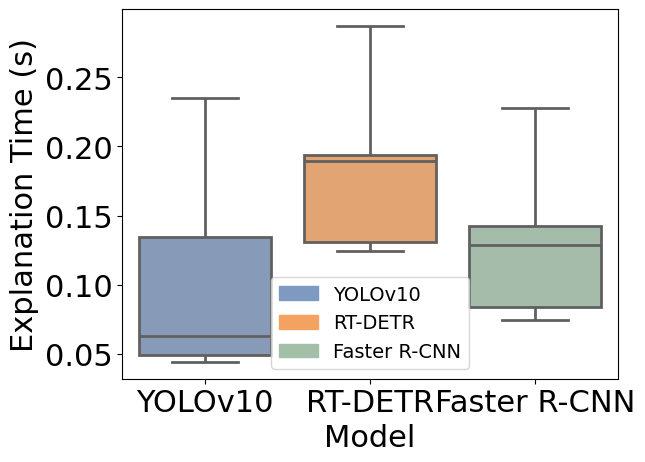

In [26]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def filter_array_2(array):
    return array

yolo = filter_array_2(filter_array(np.array(incrx_results['YOLO']['Time']).flatten()))
rtdetr = filter_array_2(filter_array(np.array(incrx_results['RT_DETR']['Time']).flatten()))
fasterrcnn = filter_array_2(filter_array(np.array(incrx_results['FASTER_RCNN']['Time']).flatten()))

data_yolo = pd.DataFrame({'value': yolo, 'category': 'YOLOv10'})
data_rtdetr = pd.DataFrame({'value': rtdetr, 'category': 'RT-DETR'})
data_fasterrcnn = pd.DataFrame({'value': fasterrcnn, 'category': 'Faster R-CNN'})


data = pd.concat([data_yolo, data_rtdetr, data_fasterrcnn])

fig, ax = plt.subplots()

sns.boxplot(data=data, x='category', y='value', ax=ax, palette={'YOLOv10': '#7F9AC1', 'RT-DETR': '#F4A261', 'Faster R-CNN': '#A3BFA8'}, linewidth=2,showfliers=False)

ax.set_xlabel('Model', fontsize=22)
ax.set_ylabel('Explanation Time (s)', fontsize=22)

ax.tick_params(axis='both', which='major', labelsize=22)

handles = [
    mpatches.Patch(color='#7F9AC1', label='YOLOv10'),
    mpatches.Patch(color='#F4A261', label='RT-DETR'),
    mpatches.Patch(color='#A3BFA8', label='Faster R-CNN')
]
ax.legend(handles=handles, loc='best', fontsize=14, title_fontsize='15')

plt.savefig("blob/incrx_boxplot.pdf", format="pdf", bbox_inches="tight", pad_inches=0, dpi=300)

plt.show()

C:\Users\santiago.calderon\AppData\Local\Temp\ipykernel_33056\2604093751.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='category', y='value', ax=ax, palette={'YOLOv10': '#7F9AC1', 'RT-DETR': '#F4A261', 'Faster R-CNN': '#A3BFA8'}, linewidth=2,showfliers=False)


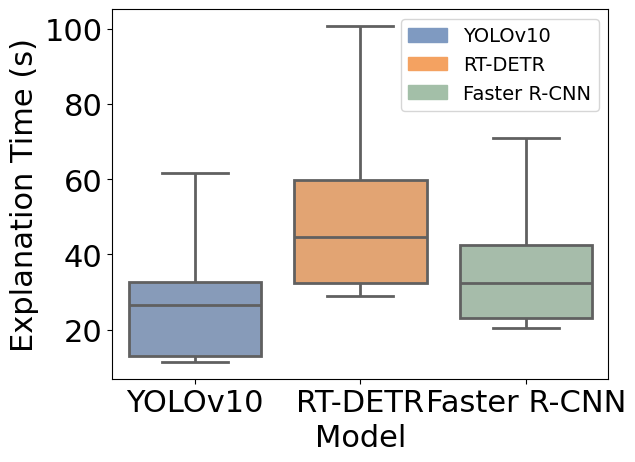

In [27]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

yolo = filter_array_2(filter_array(np.array(d_rise_results['YOLO']['Time']).flatten()))
rtdetr = filter_array_2(filter_array(np.array(d_rise_results['RT_DETR']['Time']).flatten()))
fasterrcnn = filter_array_2(filter_array(np.array(d_rise_results['FASTER_RCNN']['Time']).flatten()))

data_yolo = pd.DataFrame({'value': yolo, 'category': 'YOLOv10'})
data_rtdetr = pd.DataFrame({'value': rtdetr, 'category': 'RT-DETR'})
data_fasterrcnn = pd.DataFrame({'value': fasterrcnn, 'category': 'Faster R-CNN'})

data = pd.concat([data_yolo, data_rtdetr, data_fasterrcnn])

fig, ax = plt.subplots()

sns.boxplot(data=data, x='category', y='value', ax=ax, palette={'YOLOv10': '#7F9AC1', 'RT-DETR': '#F4A261', 'Faster R-CNN': '#A3BFA8'}, linewidth=2,showfliers=False)

ax.set_xlabel('Model', fontsize=22)
ax.set_ylabel('Explanation Time (s)', fontsize=22)

ax.tick_params(axis='both', which='major', labelsize=22)

handles = [
    mpatches.Patch(color='#7F9AC1', label='YOLOv10'),
    mpatches.Patch(color='#F4A261', label='RT-DETR'),
    mpatches.Patch(color='#A3BFA8', label='Faster R-CNN')
]
ax.legend(handles=handles,  loc='best', fontsize=14, title_fontsize='15')

plt.savefig("blob/drise_boxplot.pdf", format="pdf", bbox_inches="tight", pad_inches=0, dpi=300)

plt.show()

In [28]:
import joblib
from incx.models.model_enum import ModelEnum
import numpy as np
import pandas as pd

# Load the comparison results from a pickle file
with open('data/test_2.pkl', 'rb') as f:
    comparison_results = joblib.load(f)

def filter_zeroes(array):
    return array[array != 0]

data = []

for model in ModelEnum:
    pearson_filtered = filter_zeroes(comparison_results[model.name]['Pearson'])
    structural_filtered = filter_zeroes(comparison_results[model.name]['Structural'])
    dice_filtered = filter_zeroes(comparison_results[model.name]['Dice'])
    jaccard_filtered = filter_zeroes(comparison_results[model.name]['Jaccard'])
    
    pearson_mean = np.mean(pearson_filtered)
    structural_mean = np.mean(structural_filtered)
    dice_mean = np.mean(dice_filtered)
    jaccard_mean = np.mean(jaccard_filtered)
    
    pearson_std = np.std(pearson_filtered)
    structural_std = np.std(structural_filtered)
    dice_std = np.std(dice_filtered)
    jaccard_std = np.std(jaccard_filtered)
    
    data.append({
        'Model': model.name,
        'Correlation Coefficient Mean': pearson_mean,
        'Correlation Coefficient Std': pearson_std,
        'Structural Mean': structural_mean,
        'Structural Std': structural_std,
        'Jaccard Mean': jaccard_mean,
        'Jaccard Std': jaccard_std,
        'Dice Mean': dice_mean,
        'Dice Std': dice_std
    })

df = pd.DataFrame(data)
df.set_index('Model', inplace=True)
df.sort_index(inplace=True)
df

,Correlation Coefficient Mean,Correlation Coefficient Std,Structural Mean,Structural Std,Jaccard Mean,Jaccard Std,Dice Mean,Dice Std
Model,,,,,,,,
FASTER_RCNN,0.851728,0.113098,0.674639,0.187055,0.448083,0.212636,0.587780,0.214465
RT_DETR,0.859222,0.093897,0.711021,0.123847,0.454551,0.221600,0.590954,0.226155
YOLO,0.790914,0.134696,0.651762,0.167501,0.471258,0.258186,0.593101,0.276099
